#### ANALISIS DE TEXTO. Realizar conteo de palabras de un ARCHIVO EXCEL

#### Developed by. Luis Villarroel. Master in statistics
#### Email: l_villarro@ucb.edu.bo
####             l_villarro@yahoo.es
#### Phone. +1 (425) 3640605
#### Seattle Washington, USA

In [23]:
# Importar la biblioteca Natural Language Toolkit (NLTK)
import nltk
import pandas as pd
# Descargar los recursos necesarios para el procesamiento de lenguaje natural
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\l_vil\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\l_vil\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\l_vil\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [47]:
# Leer el archivo de Excel
df = pd.read_excel('CUALIT.xlsx')

# Seleccionar la cuarta columna (la que contiene el texto a analizar)
texts = df[df.columns[4]]

In [48]:
texts.head(5)

0                            Nos fue de mucha utilidad
1    Los materiales son de gran utilidad porque ayu...
2    Son de mucha utilidad los materiales de comuni...
3                        Los materiales son muy útiles
4                                                   Si
Name: ¿Les fueron de utilidad los materiales de comunicación?, dtype: object

In [49]:

# Juntar todos los textos en una sola variable
text = ' '.join(texts)

# Dividir el texto en tokens (palabras)
tokens = nltk.word_tokenize(text)

# Convertir los tokens a minúsculas
tokens = [word.lower() for word in tokens]

In [50]:
# Eliminar las palabras comunes (stop words)
from nltk.corpus import stopwords
stop_words = set(stopwords.words('spanish'))
tokens = [word for word in tokens if word not in stop_words]

In [51]:
# Realizar la lematización (reducir las palabras a su raíz)
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
tokens = [lemmatizer.lemmatize(word) for word in tokens]

In [52]:
# Contar la frecuencia de aparición de cada token
from collections import Counter
frequency = Counter(tokens)

In [53]:
# Imprimir los tokens y su frecuencia
for word, count in frequency.items():
    print(f'{word}: {count}')

mucha: 7
utilidad: 13
materiales: 12
gran: 2
ayudan: 1
pacientes: 2
presten: 1
atención: 2
hora: 2
charla: 1
.: 6
comunicación: 2
resulta: 2
fácil: 1
pasar: 1
mensaje: 1
usuarios: 1
,: 8
práctico: 1
puede: 1
transportar: 1
lugares: 1
dentro: 1
unidad: 1
salud: 1
útiles: 4
si: 4
información: 2
ayudaron: 1
profesionales: 1
difundir: 1
precaución: 1
propagación: 1
covid-19: 1
cuidados: 1
tener: 1
cuenta: 1
síntomas: 1
así: 2
iniciar: 1
tratamiento: 1
oportuno: 1
evitando: 1
complicaciones: 1
hospitalización: 1
útil: 3
prestan: 1
utilizamos: 1
sirve: 1
material: 1
apoyo: 1
gente: 1
pueda: 1
visualizar: 1
entender: 1
mejor: 1
impacto: 1
genus: 1
pandemia: 1
lucha: 1
covid: 1
fecha: 1
sigue: 1
activa: 1
muchísima: 2
súper: 1
trabajo: 3
promoción: 1
aporta: 1
valor: 1
contar: 1
tipo: 1
materiales.los: 1
comunidad: 1
púes: 2
facilitó: 1
pueden: 1
ayuda: 1
recordarse: 1
...: 1
ven: 1
....: 3
(: 1
aunque: 1
persona: 1
parecen: 1
dicen: 1
lindos: 1
): 1
adaptaría: 1
imagen: 1
pueblo: 1


In [54]:
print (tokens)

['mucha', 'utilidad', 'materiales', 'gran', 'utilidad', 'ayudan', 'pacientes', 'presten', 'atención', 'hora', 'charla', '.', 'mucha', 'utilidad', 'materiales', 'comunicación', 'resulta', 'fácil', 'hora', 'pasar', 'mensaje', 'usuarios', ',', 'práctico', 'puede', 'transportar', 'lugares', 'dentro', 'unidad', 'salud', '.', 'materiales', 'útiles', 'si', 'materiales', 'información', 'gran', 'utilidad', 'ayudaron', 'profesionales', 'difundir', 'información', 'precaución', 'propagación', 'covid-19', ',', 'cuidados', 'tener', 'cuenta', 'síntomas', ',', 'así', 'iniciar', 'tratamiento', 'oportuno', ',', 'evitando', 'así', 'complicaciones', 'hospitalización', 'útil', '.', 'pacientes', 'prestan', 'atención', 'si', 'utilidad', 'si', 'mucha', 'utilidad', 'útil', ',', 'utilizamos', 'materiales', 'utilidad', 'sirve', 'material', 'apoyo', 'gente', 'pueda', 'visualizar', 'entender', 'mejor', 'impacto', 'genus', 'pandemia', 'lucha', 'covid', 'fecha', 'sigue', 'activa', ',', 'útil', 'mucha', 'utilidad', '

In [55]:
# Crear un data frame con los tokens y su frecuencia
df_tokens = pd.DataFrame({'Token': list(frequency.keys()), 'Frequency': list(frequency.values())})

# Guardar el data frame en un archivo Excel
df_tokens.to_excel('tokens.xlsx', index=False)

In [57]:
df_tokens

,Token,Frequency
0,mucha,7
1,utilidad,13
2,materiales,12
3,gran,2
4,ayudan,1
...,...,...
87,lindos,1
88,),1
89,adaptaría,1
90,imagen,1


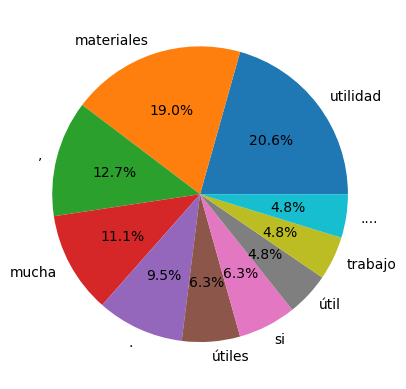

In [58]:
# Importar la biblioteca matplotlib para crear gráficos
import matplotlib.pyplot as plt

# Seleccionar solo los 10 tokens más frecuentes
df_top_tokens = df_tokens.nlargest(10, 'Frequency')

# Crear el gráfico circular
plt.pie(df_top_tokens['Frequency'], labels=df_top_tokens['Token'], autopct='%1.1f%%')

# Mostrar el gráfico
plt.show()

In [65]:
df_tokens = df_tokens[df_tokens.Token != ","]
df_tokens = df_tokens[df_tokens.Token != "."]


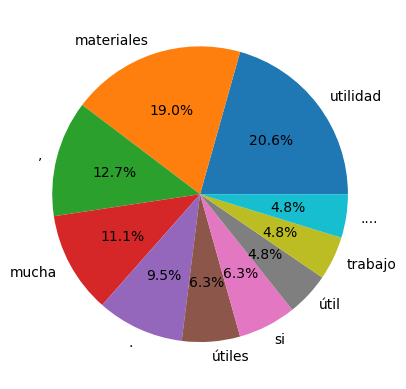

In [66]:
# Crear el gráfico circular
plt.pie(df_top_tokens['Frequency'], labels=df_top_tokens['Token'], autopct='%1.1f%%')

# Mostrar el gráfico
plt.show()

In [67]:
df_tokens.head(10)

,Token,Frequency
0,mucha,7
1,utilidad,13
2,materiales,12
3,gran,2
4,ayudan,1
5,pacientes,2
6,presten,1
7,atención,2
8,hora,2
9,charla,1


In [68]:
# Importar la biblioteca plotly.express para crear gráficos
import plotly.express as px

# Crear el treemap
fig = px.treemap(df_tokens, path=['Token'], values='Frequency')

# Mostrar el treemap
fig.show()

In [40]:
# Obtener las 10 categorías más importantes
df_tokens_top_10 = df_tokens.nlargest(5, 'Frequency')
# Crear el treemap
fig = px.treemap(df_tokens_top_10, path=['Token'], values='Frequency', title='Frecuencia de Tokens')

# Mostrar el treemap
fig.show()